In [18]:
import autorootcwd
import os
import pandas as pd
import json

In [19]:
# Path to the image folders
train_images_path = "data/coco2017/train2017"
val_images_path = "data/coco2017/val2017"

# Path to the annotations folder
annotations_path = "annotations"

# List the contents of the image folders
train_images_list = os.listdir(train_images_path)
val_images_list = os.listdir(val_images_path)

# Display the number of images in each folder
print(f"Number of images in train2017: {len(train_images_list)}")
print(f"Number of images in val2017: {len(val_images_list)}")

Number of images in train2017: 118288
Number of images in val2017: 5001


In [20]:
# Path to the JSON file
captions_train_path = "data/coco2017/annotations/captions_train2017.json"

# Read JSON file into a dataframe
with open(captions_train_path, 'r') as f:
    captions_train_data = json.load(f)

# Flatten the nested structure
captions_train_df = pd.json_normalize(captions_train_data['annotations'], sep='_')

# Display basic information about the dataframe
print(f"Number of entries in Captions Train: {len(captions_train_df)}")
print(f"Columns: {list(captions_train_df.columns)}")
print(f"\nSample data:\n{captions_train_df.head()}")

Number of entries in Captions Train: 591753
Columns: ['image_id', 'id', 'caption']

Sample data:
   image_id   id                                            caption
0    203564   37  A bicycle replica with a clock as the front wh...
1    322141   49  A room with blue walls and a white sink and door.
2     16977   89  A car that seems to be parked illegally behind...
3    106140   98  A large passenger airplane flying through the ...
4    106140  101  There is a GOL plane taking off in a partly cl...


In [21]:
# Path to the JSON file
captions_val_path = "data/coco2017/annotations/captions_val2017.json"

# Read JSON file into a dataframe
with open(captions_val_path, 'r') as f:
    captions_val_data = json.load(f)

# Flatten the nested structure
captions_val_df = pd.json_normalize(captions_val_data['annotations'], sep='_')

# Display basic information about the dataframe
print(f"Number of entries in Captions Validation: {len(captions_val_df)}")
print(f"Columns: {list(captions_val_df.columns)}")
print(f"\nSample data:\n{captions_val_df.head()}")


Number of entries in Captions Validation: 25014
Columns: ['image_id', 'id', 'caption']

Sample data:
   image_id   id                                            caption
0    179765   38  A black Honda motorcycle parked in front of a ...
1    179765  182      A Honda motorcycle parked in a grass driveway
2    190236  401  An office cubicle with four different types of...
3    331352  441          A small closed toilet in a cramped space.
4    517069  447     Two women waiting at a bench next to a street.


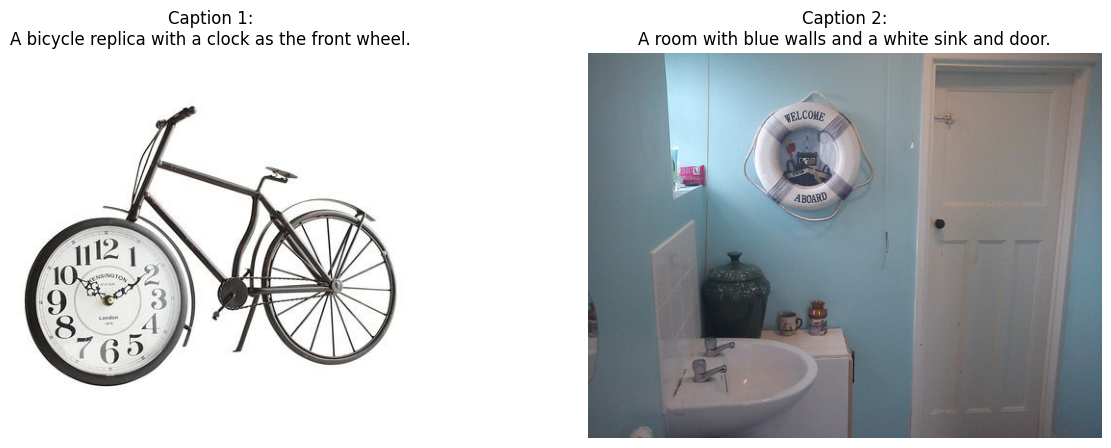

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to the train2017 images directory
images_dir = "data/coco2017/train2017/"

# Provided image IDs and captions
image_ids = [203564, 322141]
captions = [
    'A bicycle replica with a clock as the front wheel.',
    'A room with blue walls and a white sink and door.'
]

# Function to display images with captions
def display_images_with_captions(image_paths, captions):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

    for i, (image_path, caption) in enumerate(zip(image_paths, captions)):
        img = mpimg.imread(os.path.join(images_dir, image_path))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Caption {i + 1}:\n{caption}")

    plt.show()

# Display images with captions for the provided IDs
image_paths = [f"{image_id:012d}.jpg" for image_id in image_ids]
display_images_with_captions(image_paths, captions)

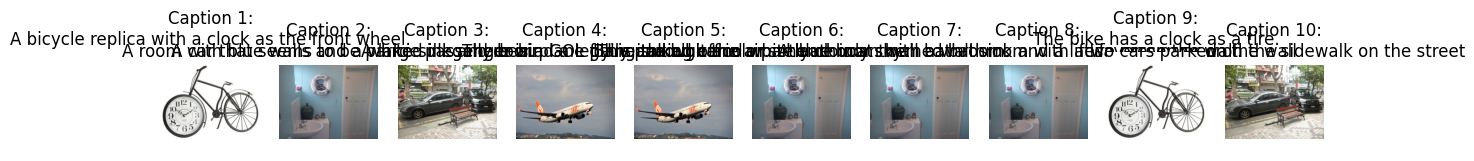

In [23]:
# Function to display images with captions for specific image IDs
def display_images_with_captions_by_ids(image_ids, dataframe):
    image_paths = [f"{image_id:012d}.jpg" for image_id in image_ids]
    captions = dataframe[dataframe['image_id'].isin(image_ids)]['caption'].tolist()
    display_images_with_captions(image_paths, captions)

# Get the first 10 image IDs and captions from the DataFrame
first_10_image_ids = captions_train_df.head(10)['image_id'].tolist() # Image ID retrieval

# Display images with captions for the first 10 image IDs
display_images_with_captions_by_ids(first_10_image_ids, captions_train_df)


In [24]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the random seed for reproducibility
random.seed(1234)

NUM_IMAGES_TO_PLOT = 10
MAX_CAPTIONS_PER_IMAGE = 4

# Function to save images with captions for specific image IDs (limit to 4 captions)
def save_images_with_captions(image_ids, dataframe, max_captions=4, save_folder="results/previews"):
    # Create the save folder if it doesn't exist
    os.makedirs(save_folder, exist_ok=True)

    for image_id in image_ids:
        # Get image path and up to 4 captions
        image_path = f"{image_id:012d}.jpg"
        captions = dataframe[dataframe['image_id'] == image_id]['caption'].tolist()[:max_captions]

        # Loop over captions and save separate images for each
        for i, caption in enumerate(captions):
            # Read and plot the image
            img = mpimg.imread(os.path.join(images_dir, image_path))
            plt.imshow(img)
            plt.axis('off')
            plt.title(caption)

            # Save the image with the caption as the filename
            save_path = os.path.join(save_folder, f"{image_id}_{i + 1}.png")
            plt.savefig(save_path, bbox_inches='tight')
            plt.close()

# Get the first 10 unique image IDs from the DataFrame
first_10_unique_image_ids = captions_train_df['image_id'].unique()[:NUM_IMAGES_TO_PLOT]

# Save images with up to 4 captions for each of the first 10 unique image IDs
save_images_with_captions(first_10_unique_image_ids, captions_train_df, max_captions=MAX_CAPTIONS_PER_IMAGE)
